Mounting the Drive

In [ ]:

from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import os
os.chdir("/content/drive/MyDrive/data")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install nltk

The Natural Language Toolkit (NLTK) is a powerful Python library widely used for working with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

# Loading of Data

In [ ]:
import pandas as pd
fake = pd.read_csv("/content/drive/MyDrive/data/Fake.csv/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/data/True.csv/True.csv")

Count null values in each fake news column

In [ ]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Count null valus in each true news column

In [ ]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


Counting  subject of each news.

In [ ]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

Give description  of true news

In [ ]:
true.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


Counting subject of each news.

In [ ]:
true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

Creating  a new column Target.And for fake we are assigning it value to 0.And for true we are assigning it to 1.

In [ ]:
fake['target'] = 0
true['target'] = 1

Merging of True and fake news into one data

In [ ]:
data = pd.concat([true, fake])

Splitting data into words

In [ ]:
test_data = data.copy()
test_data.text = data.text.apply(lambda s:s.split(" "))

Count number of  words in each data

In [ ]:
test_data["length"] = data.text.apply(lambda s: len(s.split()))

In [ ]:
test_data["length"].mean(), test_data.length.max()
test_data.reset_index(drop=True, inplace=True)

Plot length vs density

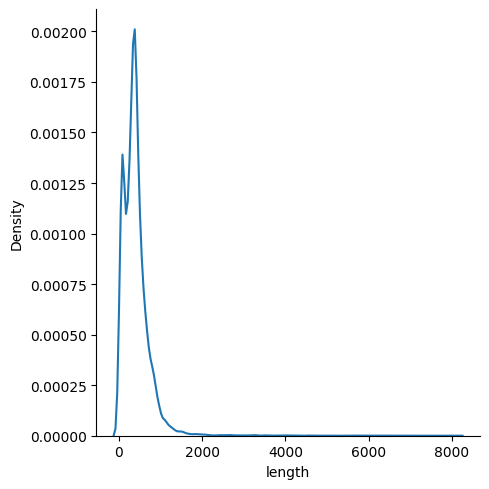

In [ ]:
import seaborn as sns
sns.displot(test_data, x="length", kind="kde");

Median of length of words in each tuple

In [ ]:
test_data.length.median()


362.0

In [ ]:
test_data

,title,text,subject,date,target,length
0,"As U.S. budget fight looms, Republicans flip t...","[WASHINGTON, (Reuters), -, The, head, of, a, c...",politicsNews,"December 31, 2017",1,749
1,U.S. military to accept transgender recruits o...,"[WASHINGTON, (Reuters), -, Transgender, people...",politicsNews,"December 29, 2017",1,624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,"[WASHINGTON, (Reuters), -, The, special, couns...",politicsNews,"December 31, 2017",1,457
3,FBI Russia probe helped by Australian diplomat...,"[WASHINGTON, (Reuters), -, Trump, campaign, ad...",politicsNews,"December 30, 2017",1,376
4,Trump wants Postal Service to charge 'much mor...,"[SEATTLE/WASHINGTON, (Reuters), -, President, ...",politicsNews,"December 29, 2017",1,852
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,"[21st, Century, Wire, says, As, 21WIRE, report...",Middle-east,"January 16, 2016",0,522
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[21st, Century, Wire, says, It, s, a, familiar...",Middle-east,"January 16, 2016",0,297
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[Patrick, Henningsen, , 21st, Century, WireRem...",Middle-east,"January 15, 2016",0,4171
44896,How to Blow $700 Million: Al Jazeera America F...,"[21st, Century, Wire, says, Al, Jazeera, Ameri...",Middle-east,"January 14, 2016",0,456


Resetting the data for better analysis

In [ ]:
data.reset_index(drop=True, inplace=True)

Dropping the columns title,subject and data

In [ ]:
data = data.drop(['title', 'subject', 'date'], axis=1)

In [ ]:
data

,text,target
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
44893,21st Century Wire says As 21WIRE reported earl...,0
44894,21st Century Wire says It s a familiar theme. ...,0
44895,Patrick Henningsen 21st Century WireRemember ...,0
44896,21st Century Wire says Al Jazeera America will...,0


In [ ]:
data.columns

Index(['text', 'target'], dtype='object')

Emot is a Python library that helps with handling emojis in text data. It provides functionalities to extract, translate, and manipulate emojis in strings.
Usage: Emot can be used to replace or remove emojis from text, translate emojis into their meanings, or simply detect and analyze the presence of emojis within text data.
Example: You can use Emot to replace emojis in a sentence with their textual descriptions:

 Contractions is a Python library that expands contractions in text data. It converts contracted forms of words into their expanded forms.
Usage: Contractions can be used to standardize text by converting words like "don't" to "do not," "won't" to "will not," and so on.
Example: Here's how you might use Contractions to expand contractions in a sentence:

Swifter is a library designed to improve the speed of Pandas' apply function by utilizing Dask to perform parallel processing for operations on Pandas DataFrames.
Usage: Swifter is used to accelerate certain operations, especially those involving apply functions on large DataFrames, by leveraging parallelization.
Example: After installing Swifter, you can use it to apply functions faster on Pandas DataFrames:

In [ ]:

!pip install emot
!pip install contractions
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=78fae5c99fb08d788291fa419395c624f2bbb97ac088071f3a3a22af2979c493
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


# Data Preprocessing

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import wordnet
import nltk
from nltk.stem import WordNetLemmatizer
import re
import string as module_string
import emot
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO
import contractions
from  textblob import TextBlob

stop = stopwords.words("english")


lem = WordNetLemmatizer()
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()


def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return 'n'
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


def clean_text(s):
    lowered_text = s.lower()
    # Handling html text
    sentence = cleanhtml(lowered_text)
    # Handling underscore and -
    sentence = re.sub("-|_", " ", sentence)

    # Extending abbrevations like he's
    sentence  = contractions.fix(sentence)
    # Handling newline and tab space charecters
    sentence = re.sub('\n|\t', "", sentence)
    """
    For Typos
    But slows the processing many times
    sentence = str(TextBlob(sentence).correct())
    """
    # Handling symbols (mainly for puncs)
    no_punc = clean_punc(sentence)
    no_num  = re.sub(r'[0-9]+', '', no_punc)
    # Getting the pos_tags after tozenizing
    l = nltk.pos_tag(nltk.word_tokenize(no_num))
    # Converting pos_tag to approriate format for lemmatizer to work with
    l = [(word,pos_tagger(tag)) for (word, tag) in l if (word not in stop) and (not word.isdigit())]
    # Using lemmatizer according to the pos_tags for proper lemmatizing
    useful = " ".join([lem.lemmatize(i, pos=j) for i, j in l if j != None])
    # Converting emoji to text
    useful = convert_emojis(useful)
    useful = re.sub("-|_", " ", useful)
    return useful.strip()
def cleanhtml(sentence):
  exp = re.compile("<.*?>")
  cleantext = exp.sub(" ", sentence)
  return cleantext

def clean_punc(text):
  exp =('[%s]' % re.escape(module_string.punctuation))
  return re.compile(exp).sub('', text)
text = "<div> </div>This is not  a text!!! It has no (parenthesis), square and  curly brackets [[{{}}]]  and hashtags #.-_$ 20 😍"
clean_text(text)


'text parenthesis square curly bracket hashtags smiling face with heart eyes'

Importing swifter for parallel processing

In [ ]:
import swifter
data.reset_index(inplace=True, drop=True)
data.text = data.text.swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/44898 [00:00<?, ?it/s]

In [ ]:
data = data.sample(frac=1)

In [ ]:
data.reset_index(inplace=True, drop=True)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(data, data.target):
  X_train = data.loc[train_idx].text.values
  X_test = data.loc[test_idx].text.values
  y_train = data.loc[train_idx].target.values
  y_test = data.loc[test_idx].target.values


In [ ]:
X_train

array(['WASHINGTON (Reuters) - U.S. Republican presidential candidate Ted Cruz’s campaign is vetting former business executive Carly Fiorina as a possible vice presidential pick, ABC News said on Friday. Earlier, Cruz’s campaign said it had narrowed its running mate options to a short list. Fiorina, a former CEO of Hewlett Packard, dropped out of the presidential race in February. ',
       'VATICAN CITY (Reuters) - Pope Francis appeared to harden the Catholic Church s teaching against nuclear weapons on Friday, saying countries should not stockpile them even for the purpose of deterrence. His remarks, at the start of a disarmament conference that brought 11 Nobel Peace Prize winners to the Vatican, appeared to go further than previous popes. They have said that while nuclear weapons should never be used, holding arsenals solely to deter other countries from using them could be morally acceptable as a step toward achieving a nuclear-free world. Addressing the group in the 16th century 

#CountVectorizer to convert textual to numerical data like sparse matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
import pandas as pd



X_train_vec = vectorizer.fit_transform(X_train)
test_vec = vectorizer.transform(X_test)


# Logistic Regression Model Implementation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming log_reg, X_train_vec, y_train, test_vec, y_test are defined as in your code
log_reg=LogisticRegression()
# Fit the logistic regression model
log_reg.fit(X_train_vec, y_train)

# Print accuracy scores
print("Training Accuracy:", log_reg.score(X_train_vec, y_train))
print("Testing Accuracy:", log_reg.score(test_vec, y_test))

# Make predictions on the test set
y_pred = log_reg.predict(test_vec)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9999721588061696
Testing Accuracy: 0.9961024498886414
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Naive Bayes Model Implementation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Assuming nb_model, X_train_vec, y_train, test_vec, y_test are defined as in your code
nb_model = MultinomialNB()
# Fit the Naive Bayes model
nb_model.fit(X_train_vec, y_train)

# Print accuracy scores
print("Training Accuracy:", nb_model.score(X_train_vec, y_train))
print("Testing Accuracy:", nb_model.score(test_vec, y_test))

# Make predictions on the test set
y_pred_nb = nb_model.predict(test_vec)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Training Accuracy: 0.9616348349017206
Testing Accuracy: 0.9518930957683742
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4696
           1       0.95      0.95      0.95      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming rf_model, X_train_vec, y_train, test_vec, y_test are defined as in your code
rf_model = RandomForestClassifier()
# Fit the Random Forest model
rf_model.fit(X_train_vec, y_train)

# Print accuracy scores
print("Training Accuracy:", rf_model.score(X_train_vec, y_train))
print("Testing Accuracy:", rf_model.score(test_vec, y_test))

# Make predictions on the test set
y_pred_rf = rf_model.predict(test_vec)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Training Accuracy: 0.9999721588061696
Testing Accuracy: 0.9884187082405346
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming dt_model, X_train_vec, y_train, test_vec, y_test are defined as in your code
dt_model = DecisionTreeClassifier()
# Fit the Decision Tree model
dt_model.fit(X_train_vec, y_train)

# Print accuracy scores
print("Training Accuracy:", dt_model.score(X_train_vec, y_train))
print("Testing Accuracy:", dt_model.score(test_vec, y_test))

# Make predictions on the test set
y_pred_dt = dt_model.predict(test_vec)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Training Accuracy: 0.9999721588061696
Testing Accuracy: 0.9968819599109131
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# SVM classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming svm_model, X_train_vec, y_train, test_vec, y_test are defined as in your code
svm_model = SVC()
# Fit the SVM model
svm_model.fit(X_train_vec, y_train)

# Print accuracy scores
print("Training Accuracy:", svm_model.score(X_train_vec, y_train))
print("Testing Accuracy:", svm_model.score(test_vec, y_test))

# Make predictions on the test set
y_pred_svm = svm_model.predict(test_vec)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Training Accuracy: 0.996798262709505
Testing Accuracy: 0.994097995545657
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report

# Assuming pac_model, X_train_vec, y_train, test_vec, y_test are defined as in your code
pac_model = PassiveAggressiveClassifier()
# Fit the Passive-Aggressive classifier
pac_model.fit(X_train_vec, y_train)

# Print accuracy scores
print("Training Accuracy:", pac_model.score(X_train_vec, y_train))
print("Testing Accuracy:", pac_model.score(test_vec, y_test))

# Make predictions on the test set
y_pred_pac = pac_model.predict(test_vec)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_pac))


Training Accuracy: 0.9996102232863745
Testing Accuracy: 0.9928730512249443
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# KNN Model Implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming knn_model, X_train_vec, y_train, test_vec, y_test are defined as in your code
knn_model = KNeighborsClassifier()
# Fit the KNN classifier
knn_model.fit(X_train_vec, y_train)

# Print accuracy scores
print("Training Accuracy:", knn_model.score(X_train_vec, y_train))
print("Testing Accuracy:", knn_model.score(test_vec, y_test))

# Make predictions on the test set
y_pred_knn = knn_model.predict(test_vec)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


Training Accuracy: 0.9280861963360989
Testing Accuracy: 0.8947661469933185
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      4696
           1       0.87      0.92      0.89      4284

    accuracy                           0.89      8980
   macro avg       0.89      0.90      0.89      8980
weighted avg       0.90      0.89      0.89      8980



# XGBOOST Model Implementation

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Assuming xgb_model, X_train_vec, y_train, test_vec, y_test are defined as in your code
xgb_model = xgb.XGBClassifier()
# Fit the XGBoost model
xgb_model.fit(X_train_vec, y_train)

# Print accuracy scores
print("Training Accuracy:", xgb_model.score(X_train_vec, y_train))
print("Testing Accuracy:", xgb_model.score(test_vec, y_test))

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(test_vec)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Training Accuracy: 0.9999721588061696
Testing Accuracy: 0.9987750556792873
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# ADABOOST Model Implementation:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# Assuming ada_model, X_train_vec, y_train, test_vec, y_test are defined as in your code
ada_model = AdaBoostClassifier()
# Fit the AdaBoost classifier
ada_model.fit(X_train_vec, y_train)

# Print accuracy scores
print("Training Accuracy:", ada_model.score(X_train_vec, y_train))
print("Testing Accuracy:", ada_model.score(test_vec, y_test))

# Make predictions on the test set
y_pred_ada = ada_model.predict(test_vec)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))


Training Accuracy: 0.9965198507712011
Testing Accuracy: 0.9967706013363029
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# Accuracy analysis For different models

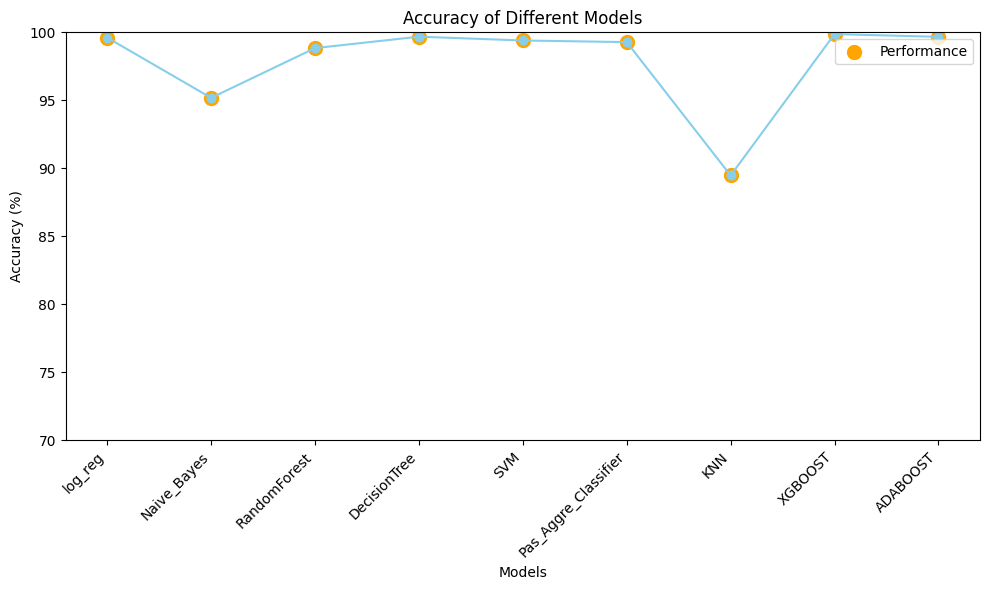

In [ ]:
import matplotlib.pyplot as plt

performance_metrics = {
    'log_reg': 99.61,
    'Naive_Bayes': 95.18,
    'RandomForest': 98.84,
    'DecisionTree': 99.68,
    'SVM': 99.40,
    'Pas_Aggre_Classifier': 99.28,
    'KNN': 89.47,
    'XGBOOST': 99.87,
    'ADABOOST': 99.67
}

# Extract model names and their respective performance metrics
models = list(performance_metrics.keys())
scores = list(performance_metrics.values())

# Create figure and axes
plt.figure(figsize=(10, 6))

# Plot scatter plot
plt.scatter(models, scores, color='orange', label='Performance', s=100)

# Connect points with lines
for i in range(len(models) - 1):
    plt.plot(models[i:i+2], scores[i:i+2], color='skyblue', linestyle='-', marker='o')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(70, 100)  # Set y-axis limits
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
